<a href="https://colab.research.google.com/github/Lokesh-508/Market-Basket-Analysis/blob/main/MarketBasketAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AIM: Performing Market Basket Analysis Using Apriori Algorithm on Groceries dataset.**






---





**Description:** Market Basket analysis is a data mining method focusing on discovering purchase 
patterns of the customers by extracting association or co-occurrences from a store’s
transactional data
For example, when the person checkout items in a supermarket all the 
details about their purchase goes into the transaction database. Later, this huge data of 
many customers are analyzed to determine the purchasing pattern of customers. 

* **Association rule mining** is a technique to identify frequent patterns and associations among a set of items.



* For example, understanding customer buying habits. By finding correlations and associations between different items that customers place in their ‘shopping basket,’ recurring patterns can be derived.
* The key concept in the Apriori algorithm is that it assumes all subsets of a frequent itemset to be frequent. Similarly, for any infrequent itemset, all its supersets must also be infrequent.


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df.shape #returns number of rows and columns in the dataframe

(38765, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


* **isnull()** returns a boolean dataframe based on the values in the dataframe.
* **sum()** returns column wise sum of values in dataframe.(True=1,False=0)
* **sort_values()** function sorts a data frame in Ascending or Descending order.


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

* **groupby()**  is used for grouping the data according to the categories and apply a function to the categories. It also helps to aggregate data efficiently.
* **size()** It returns a pandas series that possess the total number of row count for each group. 

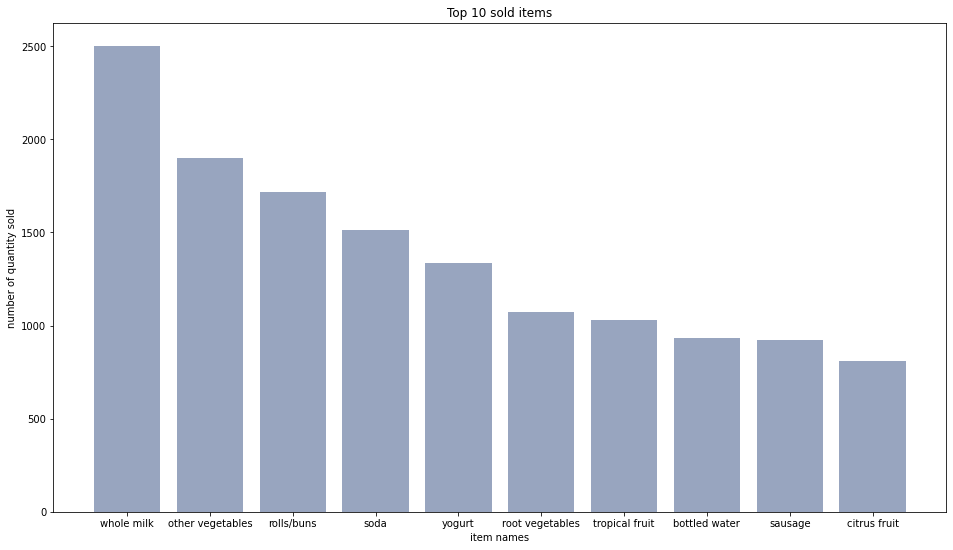

In [ ]:
data=df.groupby(by='itemDescription').size().to_frame().reset_index()
data.columns=['itemDescription','Frequency']
data=data.sort_values(by="Frequency",ascending=False).head(10)

x_Axis=data['itemDescription']
y_Axis=data['Frequency']

plt.figure(figsize=(16,9))

plt.bar(x_Axis,y_Axis,color=(0.2,0.3,0.5,0.5))

plt.title("Top 10 sold items")
plt.xlabel("item names")
plt.ylabel("number of quantity sold")


plt.show()


* cust_level is a dataframe containing Member_number and itemDescription 

In [ ]:
cust_level=df[["Member_number","itemDescription"]].sort_values(by="Member_number",ascending=False)
cust_level['itemDescription']=cust_level["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


* Transactions is a collection of lists of items purchased by each customer

In [ ]:
print(len(cust_level.itemDescription.unique()))
print(len(cust_level.Member_number.unique()))

167
3898


In [ ]:
transactions=[a[1]['itemDescription'].tolist() for a in list(cust_level.groupby("Member_number"))]

In [ ]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=d398ceefa0d504cd205e2a4387a752e418330a28b01fe8f21514d91b4d30d825
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


* **Support** of item x is the ratio of the number of transactions in which item x appears to the total number of transactions.

* **Confidence** (x => y) signifies the likelihood of the item y being purchased when item x is purchased. This method takes into account the popularity of item x.

* **Lift** (x => y) is nothing but the ‘interestingness’ or the likelihood of the item y being purchased when item x is sold.

In [ ]:
from apyori import apriori
rules=apriori(transactions=transactions,min_support=0. ,min_confidence=0.05,min_lift=3,min_length=3)

In [ ]:
results=list(rules)

In [ ]:
results

[RelationRecord(items=frozenset({'UHT-milk', 'kitchen towels'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'potato products', 'beef'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'coffee', 'canned fruit'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'domestic eggs', 'meat spreads'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [ ]:
result=results[0]
print(result)
print(result[0])
print(result[1])
print(result[2])
print(result[2][0])
print(result[2][0][0])#rhs
print(result[2][0][1])#lhs
print(result[2][0][2])#confidence
print(result[2][0][3])#lift

RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)])
frozenset({'kitchen towels', 'UHT-milk'})
0.002308876346844536
[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]
OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)
frozenset({'kitchen towels'})
frozenset({'UHT-milk'})
0.30000000000000004
3.821568627450981


In [ ]:
def inspect(results):
  lhs=[tuple(result[2][0][0])[0:2] for result in results]
  rhs=[tuple(result[2][0][1])[0:3] for result in results]
  supports=[result[1] for result in results]
  confidence=[result[2][0][2] for result in results]
  lifts=[result[2][0][3] for result in results]
  return list(zip(lhs,rhs,supports,confidence,lifts))
resultsindataframe=pd.DataFrame(inspect(results),columns=['Antecedent','Consequent','Support','Confidence','Lift'])

In [ ]:
resultsindataframe.nlargest(n=10,columns='Lift')

,Antecedent,Consequent,Support,Confidence,Lift
4915,"(berries, bottled water)","(other vegetables, pork, pip fruit)",0.002052,0.105263,14.654135
4914,"(berries, bottled water)","(other vegetables, pork, whole milk)",0.002052,0.105263,12.068111
2674,"(oil, beef)","(soda, pork, other vegetables)",0.002052,0.242424,11.524021
3573,"(citrus fruit, brown bread)","(specialty chocolate, soda, yogurt)",0.002052,0.073394,11.443670
4133,"(long life bakery product, citrus fruit)","(rolls/buns, whole milk, meat)",0.002052,0.148148,11.105413
3290,"(oil, bottled water)","(sausage, soda, citrus fruit)",0.002052,0.150943,10.322410
2904,"(bottled beer, brown bread)","(other vegetables, rolls/buns, misc. beverages)",0.002309,0.097826,9.533152
5045,"(bottled water, meat)","(soda, whole milk, pastry)",0.002052,0.135593,9.438257
2902,"(bottled beer, brown bread)","(domestic eggs, root vegetables, pastry)",0.002052,0.086957,9.415459
2734,"(berries, bottled water)","(soda, shopping bags, brown bread)",0.002309,0.118421,9.232105
